# Init

In [1]:
import os, sys, time

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "../")
import toolsdiadem.tools as dia
import toolsdiadem.ser as ser
from toolsdiadem.Probe import Probe
from toolsdiadem.ConfigSer import ConfigSer

In [2]:
#%matplotlib qt5
%load_ext autoreload
%autoreload 2

In [40]:
cmap='jet'
configFilename = f"C:/Users/pleroy/Documents/CAMILL/SER/WR15_v2/WR10_plaqueSupport.ini"
conf = ConfigSer(configFilename)

# Données de la probe

In [41]:
tmp = np.loadtxt(f"{conf.out_path}/data/S11_probe_interpolated.txt")
S11_probe = tmp[:,1] + 1j * tmp[:,2]
freq_probe = tmp[:,0] / 1e9
d = np.linspace( 0, 300 / ( freq_probe[1] - freq_probe[0] ), freq_probe.size ) * 0.5

# Calcul du fond de chambre
ref: ser4siepel_multiband_scan_elev_F2C.sce

In [42]:
S11_f2c = ser.computeF2C(conf.base_path, conf.dic_dir, conf.nb_elev, conf.nb_freq, conf.nb_ssb, tag="WR10_")

nbAbs = 19
20200709
036_A
037_C
20200715
038_E
040_W_u_v2
041_V_u
042_G
043_L
044_M
045_X
046_O
047_N
048_K
20200716
049_J
050_I
051_H
052_AB
053_D_u
054_T
055_N


Text(0.5, 1.0, 'time domain')

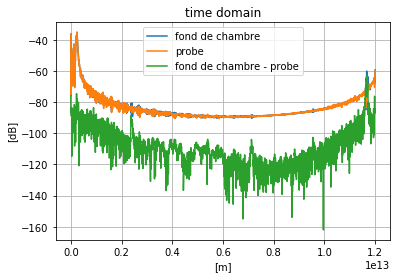

In [43]:
fig, ax = plt.subplots(1,1)
ax.plot(d, ser.dB(np.fft.ifft(S11_f2c)), label="fond de chambre" )
ax.plot(d, ser.dB(np.fft.ifft(S11_probe)), label="probe")
ax.plot(d, ser.dB(np.fft.ifft(S11_f2c - S11_probe ) ), label="fond de chambre - probe")
ax.grid()
ax.legend()
ax.set_xlabel("[m]")
ax.set_ylabel("[dB]")
ax.set_title( "time domain" )

# Sauvegarde des données

In [44]:
file_f2c = f"{conf.out_path}/data/S11_fond_de_chambre.txt"
tmp[:,1] = np.real(S11_f2c)
tmp[:,2] = np.imag(S11_f2c)
np.savetxt(file_f2c, tmp, header="#GHz real imag")
print(file_f2c)

C:/Users/pleroy/Documents/CAMILL/SER/WR15_v2/processing/wr10/data/S11_fond_de_chambre.txt
